In [79]:
from datetime import datetime
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [80]:
df = pd.read_csv(r'HealthApp_2k.log_structured.csv', encoding = 'unicode_escape') #dataframe 

In [3]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [81]:
df['Time'] = df['Time'].astype("string")

In [82]:
df.rename(columns = {'Time' : 'DateTime'}, inplace = True)

In [7]:
df.head()

,LineId,DateTime,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [83]:
df[['Date','Time']] = df['DateTime'].str.split('-',expand = True)

In [9]:
df.head()

,LineId,DateTime,Component,Pid,Content,EventId,EventTemplate,Date,Time
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,20171223,22:15:29:606
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,20171223,22:15:29:615
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,20171223,22:15:29:633
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,20171223,22:15:29:635
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,20171223,22:15:29:635


In [84]:
df['Date'] = pd.to_datetime(df['Date'])

In [86]:
df.head()

,LineId,DateTime,Component,Pid,Content,EventId,EventTemplate,Date,Time
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22:15:29:606
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017-12-23,22:15:29:615
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22:15:29:633
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,22:15:29:635
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017-12-23,22:15:29:635


In [85]:
df.columns

Index(['LineId', 'DateTime', 'Component', 'Pid', 'Content', 'EventId',
       'EventTemplate', 'Date', 'Time'],
      dtype='object')

<Axes: xlabel='Date', ylabel='count'>

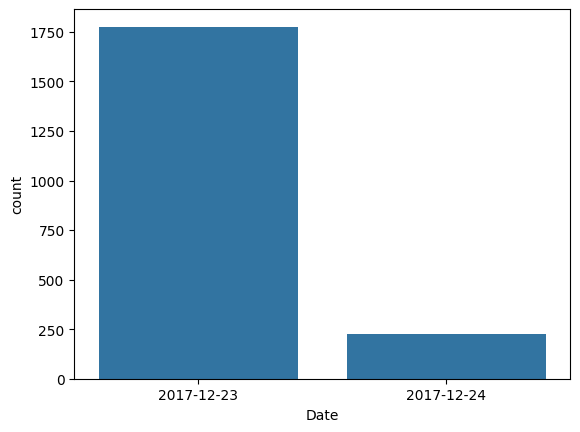

In [87]:
sns.countplot(x='Date', data = df)

In [88]:
df['Content'] = df['Content'].astype("string")

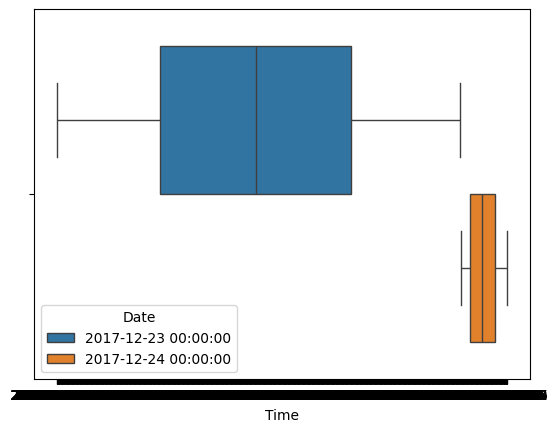

In [111]:
ax = sns.boxplot(data = df, x = 'Time', hue = 'Date') 
for bars in ax.containers:
     if(df['Content'].apply(lambda x: x.isdigit()).any()):
         ax.bar_label(bars)

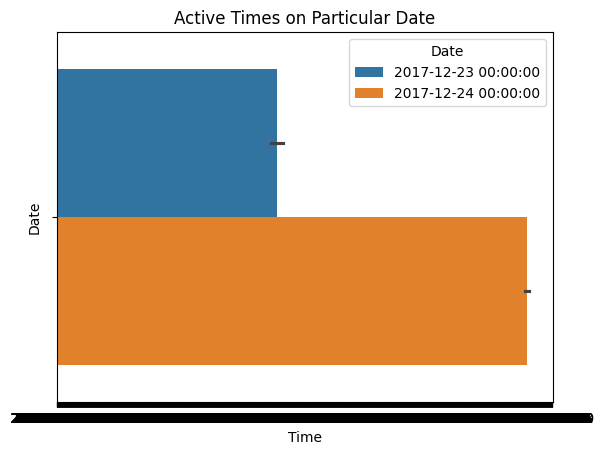

In [115]:
ax = sns.barplot(data = df, x = 'Time', hue = 'Date') 
for bars in ax.containers:
     if(df['Content'].apply(lambda x: x.isdigit()).any()):
         ax.bar_label(bars)
plt.xlabel('Time')
plt.ylabel('Date')
plt.title('Active Times on Particular Date')

# Show the plot
plt.show()

In [128]:
calories = df['Content'].apply(lambda x: x.find('calculateCaloriesWithCache totalCalories') != -1).astystr.extract(r'(\d+)')
ax = sns.barplot(data = df, x = calories, hue = 'Date') 
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Time')
plt.ylabel('Date')
plt.title('Active Times on Particular Date')

# Show the plot
plt.show()

AttributeError: Can only use .str accessor with string values!